<a href="https://colab.research.google.com/github/gui98araujo/Amb_Git/blob/main/Regressao_linear_multipla_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [6]:
credito=pd.read_excel('/content/Cópia de Limite_Credito_Dummy.xlsx')
credito.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


In [8]:
credito.rename(columns={'Gênero':'Região', 'Região':'Gênero'},inplace=True)

In [9]:
credito.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Região,Gênero,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


In [10]:
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Idade                    48 non-null     int64 
 1   RendimentoTotal          48 non-null     int64 
 2   Salario                  48 non-null     int64 
 3   LimitedeCreditoImediato  48 non-null     int64 
 4   Escolaridade             48 non-null     object
 5   Região                   48 non-null     object
 6   Gênero                   48 non-null     object
 7   LimitedoChequeEspecial   48 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 3.1+ KB


In [11]:
credito.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,61.458333,12275.083333,10507.125000,2175.208333,5620.729167
std,15.284477,12640.654241,9332.173617,938.094469,6131.900367
min,30.000000,4300.000000,4027.000000,340.000000,500.000000
25%,47.000000,6380.000000,5950.000000,1925.000000,2262.500000
50%,66.500000,8400.000000,7400.000000,2000.000000,3550.000000
75%,70.000000,12378.250000,10163.000000,3000.000000,6500.000000
max,94.000000,81000.000000,54500.000000,3500.000000,35000.000000


In [12]:
credito.corr()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
Idade,1.000000,0.239445,0.213186,0.057183,0.228117
RendimentoTotal,0.239445,1.000000,0.960551,0.031041,0.858120
Salario,0.213186,0.960551,1.000000,0.081792,0.888839
LimitedeCreditoImediato,0.057183,0.031041,0.081792,1.000000,0.226990
LimitedoChequeEspecial,0.228117,0.858120,0.888839,0.226990,1.000000


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
le.fit(credito.Escolaridade)
credito.Escolaridade=le.transform(credito.Escolaridade)

le.fit(credito['Gênero'])
credito['Gênero']=le.transform(credito['Gênero'])


le.fit(credito['Região'])
credito['Região']=le.transform(credito['Região'])


In [16]:
credito.head(30)

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Região,Gênero,LimitedoChequeEspecial
0,70,10736,5214,400,0,0,0,500
1,68,5000,5000,380,0,0,0,600
2,44,5800,5800,500,0,0,0,800
3,72,4300,4300,2000,0,0,0,1000
4,75,4400,4400,3000,0,0,0,1000
5,35,5000,5000,1000,0,0,0,1000
6,80,8100,8100,3500,0,0,0,1000
7,66,4800,4800,440,0,0,0,1500
8,39,6320,6320,1550,0,0,0,1640
9,47,5000,5000,2000,0,1,0,1700


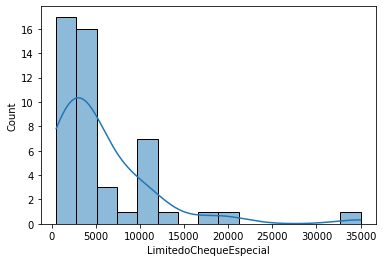

In [18]:
sns.histplot(credito,x='LimitedoChequeEspecial', kde=True)
#Não possui normal

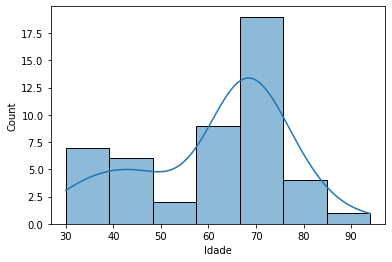

In [19]:
sns.histplot(credito,x='Idade', kde=True)

In [20]:
credito.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Região,Gênero,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,61.458333,12275.083333,10507.125000,2175.208333,0.375000,0.458333,0.500000,5620.729167
std,15.284477,12640.654241,9332.173617,938.094469,0.489246,0.503534,0.505291,6131.900367
min,30.000000,4300.000000,4027.000000,340.000000,0.000000,0.000000,0.000000,500.000000
25%,47.000000,6380.000000,5950.000000,1925.000000,0.000000,0.000000,0.000000,2262.500000
50%,66.500000,8400.000000,7400.000000,2000.000000,0.000000,0.000000,0.500000,3550.000000
75%,70.000000,12378.250000,10163.000000,3000.000000,1.000000,1.000000,1.000000,6500.000000
max,94.000000,81000.000000,54500.000000,3500.000000,1.000000,1.000000,1.000000,35000.000000


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
credito_norm=pd.DataFrame(scaler.fit_transform(credito),index=credito.index,columns=credito.columns)
credito_norm.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Região,Gênero,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.491536,0.103978,0.128388,0.580762,0.375000,0.458333,0.500000,0.148427
std,0.238820,0.164806,0.184894,0.296865,0.489246,0.503534,0.505291,0.177736
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.265625,0.027119,0.038100,0.501582,0.000000,0.000000,0.000000,0.051087
50%,0.570312,0.053455,0.066828,0.525316,0.000000,0.000000,0.500000,0.088406
75%,0.625000,0.105323,0.121570,0.841772,1.000000,1.000000,1.000000,0.173913
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
import statsmodels.formula.api as smf
function='LimitedoChequeEspecial~Idade+	RendimentoTotal+	Salario+	LimitedeCreditoImediato+	Escolaridade+	Região+	Gênero'
model=smf.ols(formula=function, data=credito_norm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.886
Model:                                OLS   Adj. R-squared:                  0.865
Method:                     Least Squares   F-statistic:                     44.20
Date:                    Thu, 01 Dec 2022   Prob (F-statistic):           7.44e-17
Time:                            05:02:24   Log-Likelihood:                 67.328
No. Observations:                      48   AIC:                            -118.7
Df Residuals:                          40   BIC:                            -103.7
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [28]:
function='LimitedoChequeEspecial~	RendimentoTotal+	Salario+	LimitedeCreditoImediato+	Escolaridade+	Região+	Gênero'
model=smf.ols(formula=function, data=credito_norm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.885
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     52.78
Date:                    Thu, 01 Dec 2022   Prob (F-statistic):           9.97e-18
Time:                            05:02:32   Log-Likelihood:                 67.299
No. Observations:                      48   AIC:                            -120.6
Df Residuals:                          41   BIC:                            -107.5
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [29]:
function='LimitedoChequeEspecial~	RendimentoTotal+	Salario+	Escolaridade+	Região+	Gênero'
model=smf.ols(formula=function, data=credito_norm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.884
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     64.26
Date:                    Thu, 01 Dec 2022   Prob (F-statistic):           1.39e-18
Time:                            05:02:54   Log-Likelihood:                 67.097
No. Observations:                      48   AIC:                            -122.2
Df Residuals:                          42   BIC:                            -111.0
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
In

In [30]:
function='LimitedoChequeEspecial~	RendimentoTotal+	Salario+	Região+	Gênero'
model=smf.ols(formula=function, data=credito_norm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.883
Model:                                OLS   Adj. R-squared:                  0.872
Method:                     Least Squares   F-statistic:                     80.75
Date:                    Thu, 01 Dec 2022   Prob (F-statistic):           2.02e-19
Time:                            05:03:06   Log-Likelihood:                 66.709
No. Observations:                      48   AIC:                            -123.4
Df Residuals:                          43   BIC:                            -114.1
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
In

In [31]:
function='LimitedoChequeEspecial~	Salario+	Região+	Gênero'
model=smf.ols(formula=function, data=credito_norm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.879
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     106.7
Date:                    Thu, 01 Dec 2022   Prob (F-statistic):           3.24e-20
Time:                            05:03:19   Log-Likelihood:                 66.039
No. Observations:                      48   AIC:                            -124.1
Df Residuals:                          44   BIC:                            -116.6
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [32]:
function='LimitedoChequeEspecial~	Salario+	Região+	Gênero-1'
model=smf.ols(formula=function, data=credito_norm).fit()
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     LimitedoChequeEspecial   R-squared (uncentered):                   0.925
Model:                                OLS   Adj. R-squared (uncentered):              0.920
Method:                     Least Squares   F-statistic:                              185.0
Date:                    Thu, 01 Dec 2022   Prob (F-statistic):                    2.56e-25
Time:                            05:03:56   Log-Likelihood:                          64.573
No. Observations:                      48   AIC:                                     -123.1
Df Residuals:                          45   BIC:                                     -117.5
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [34]:
x=credito_norm[['Salario','Região','Gênero']]
y=credito_norm[['LimitedoChequeEspecial']]

In [36]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [38]:
r_sqr=lr.score(x,y)
r_sqr

0.8791882143098557

In [42]:
y_pred_train=lr.predict(x_train)
print('MAE: ',metrics.mean_absolute_error(y_train,y_pred_train))
print('MSE: ',metrics.mean_squared_error(y_train,y_pred_train))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

MAE:  0.03535260038720454
MSE:  0.0024122510423403173
RMSE:  0.04911467237333786


In [43]:
y_pred_test=lr.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

MAE:  0.06543044287056327
MSE:  0.008770831909357938
RMSE:  0.09365271971148482


##CAR PRICE ##

In [44]:
cars=pd.read_csv('/content/Cópia de CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [45]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [46]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [47]:
objList = cars.select_dtypes(include = "object").columns

In [48]:
objList

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for feat in objList:
    cars[feat] = le.fit_transform(cars[feat].astype(str))

In [50]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


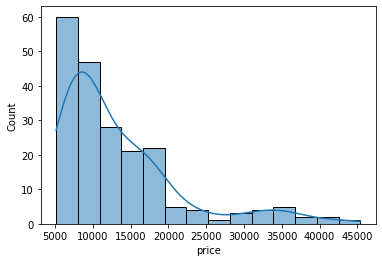

In [52]:
sns.histplot(cars,x='price',kde=True)

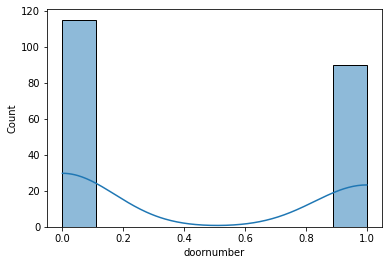

In [53]:
sns.histplot(cars,x='doornumber',kde=True)

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cars_norm=pd.DataFrame(scaler.fit_transform(cars),index=cars.index,columns=cars.columns)
cars_norm.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.500000,0.566829,0.528834,0.902439,0.180488,0.439024,0.653659,0.663415,0.014634,0.354419,...,0.248707,0.464808,0.564111,0.564483,0.196409,0.233821,0.398009,0.339431,0.388190,0.202540
std,0.290797,0.249061,0.280922,0.297446,0.385535,0.497483,0.214770,0.278085,0.120377,0.175562,...,0.157142,0.287601,0.193460,0.149332,0.248253,0.164767,0.194688,0.181726,0.181222,0.198323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.400000,0.301370,1.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.230321,...,0.135849,0.142857,0.435714,0.495238,0.100000,0.091667,0.265306,0.166667,0.236842,0.066283
50%,0.500000,0.600000,0.547945,1.000000,0.000000,0.000000,0.750000,0.500000,0.000000,0.303207,...,0.222642,0.714286,0.550000,0.580952,0.125000,0.195833,0.428571,0.305556,0.368421,0.128519
75%,0.750000,0.800000,0.787671,1.000000,0.000000,1.000000,0.750000,1.000000,0.000000,0.460641,...,0.301887,0.714286,0.742857,0.638095,0.150000,0.283333,0.551020,0.472222,0.473684,0.282632
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
import statsmodels.formula.api as smf
function='price~symboling+CarName+fueltype+aspiration+carlength+carwidth+carheight+curbweight+cylindernumber+enginetype+doornumber+carbody+drivewheel+enginelocation+wheelbase+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model=smf.ols(formula=function, data=cars_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     66.24
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           2.26e-76
Time:                        05:42:24   Log-Likelihood:                 275.56
No. Observations:                 205   AIC:                            -501.1
Df Residuals:                     180   BIC:                            -418.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1177      0.191  

In [57]:
function='price~symboling+CarName+aspiration+carlength+carwidth+carheight+curbweight+cylindernumber+enginetype+doornumber+carbody+drivewheel+enginelocation+wheelbase+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model=smf.ols(formula=function, data=cars_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     69.50
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           2.70e-77
Time:                        05:43:30   Log-Likelihood:                 275.55
No. Observations:                 205   AIC:                            -503.1
Df Residuals:                     181   BIC:                            -423.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0960      0.077  

In [58]:
function='price~CarName+aspiration+carlength+carwidth+carheight+curbweight+cylindernumber+enginetype+doornumber+carbody+drivewheel+enginelocation+wheelbase+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model=smf.ols(formula=function, data=cars_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     73.03
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           3.22e-78
Time:                        05:43:59   Log-Likelihood:                 275.52
No. Observations:                 205   AIC:                            -505.0
Df Residuals:                     182   BIC:                            -428.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0898      0.073  

In [59]:
function='price~CarName+aspiration+carwidth+carheight+curbweight+cylindernumber+enginetype+doornumber+carbody+drivewheel+enginelocation+wheelbase+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model=smf.ols(formula=function, data=cars_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     76.89
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           3.76e-79
Time:                        05:44:31   Log-Likelihood:                 275.47
No. Observations:                 205   AIC:                            -506.9
Df Residuals:                     183   BIC:                            -433.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0943      0.071  

In [60]:
function='price~CarName+aspiration+carwidth+carheight+curbweight+cylindernumber+enginetype+doornumber+carbody+drivewheel+enginelocation+wheelbase+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model=smf.ols(formula=function, data=cars_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     81.06
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           4.63e-80
Time:                        05:45:05   Log-Likelihood:                 275.34
No. Observations:                 205   AIC:                            -508.7
Df Residuals:                     184   BIC:                            -438.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0872      0.069  

In [61]:
function='price~CarName+aspiration+carwidth+carheight+curbweight+enginetype+doornumber+carbody+drivewheel+enginelocation+wheelbase+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model=smf.ols(formula=function, data=cars_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     85.65
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           5.66e-81
Time:                        05:45:25   Log-Likelihood:                 275.18
No. Observations:                 205   AIC:                            -510.4
Df Residuals:                     185   BIC:                            -443.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0777      0.067  

In [62]:
function='price~CarName+aspiration+carwidth+carheight+curbweight+enginetype+doornumber+carbody+drivewheel+enginelocation+wheelbase+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+highwaympg'
model=smf.ols(formula=function, data=cars_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     90.68
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           7.09e-82
Time:                        05:46:04   Log-Likelihood:                 274.97
No. Observations:                 205   AIC:                            -511.9
Df Residuals:                     186   BIC:                            -448.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0812      0.067  

In [63]:
function='price~CarName+carwidth+carheight+curbweight+enginetype+doornumber+carbody+drivewheel+enginelocation+wheelbase+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+highwaympg'
model=smf.ols(formula=function, data=cars_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     96.35
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           8.32e-83
Time:                        05:46:28   Log-Likelihood:                 274.79
No. Observations:                 205   AIC:                            -513.6
Df Residuals:                     187   BIC:                            -453.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0773      0.066  

In [64]:
function='price~CarName+carwidth+carheight+curbweight+enginetype+doornumber+carbody+drivewheel+enginelocation+wheelbase+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm'
model=smf.ols(formula=function, data=cars_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     102.6
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           1.02e-83
Time:                        05:47:02   Log-Likelihood:                 274.54
No. Observations:                 205   AIC:                            -515.1
Df Residuals:                     188   BIC:                            -458.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0455      0.047  

In [65]:
function='price~CarName+carwidth+carheight+curbweight+doornumber+carbody+drivewheel+enginelocation+wheelbase+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm'
model=smf.ols(formula=function, data=cars_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     109.5
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           1.43e-84
Time:                        05:47:28   Log-Likelihood:                 274.09
No. Observations:                 205   AIC:                            -516.2
Df Residuals:                     189   BIC:                            -463.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0316      0.044  

In [66]:
function='price~CarName+carwidth+carheight+curbweight-1+doornumber+carbody+drivewheel+enginelocation+wheelbase+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm'
model=smf.ols(formula=function, data=cars_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              238.1
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                   2.35e-114
Time:                        05:47:47   Log-Likelihood:                          273.81
No. Observations:                 205   AIC:                                     -517.6
Df Residuals:                     190   BIC:                                     -467.8
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [67]:
function='price~CarName+carwidth+carheight+curbweight-1+doornumber+carbody+drivewheel+enginelocation+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm'
model=smf.ols(formula=function, data=cars_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              254.1
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                   3.31e-115
Time:                        05:48:10   Log-Likelihood:                          272.92
No. Observations:                 205   AIC:                                     -517.8
Df Residuals:                     191   BIC:                                     -471.3
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [68]:
function='price~CarName+carwidth+carheight+curbweight-1+doornumber+carbody+drivewheel+enginelocation+enginesize+stroke+compressionratio+horsepower+peakrpm'
model=smf.ols(formula=function, data=cars_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              272.1
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                   5.21e-116
Time:                        05:48:42   Log-Likelihood:                          271.87
No. Observations:                 205   AIC:                                     -517.7
Df Residuals:                     192   BIC:                                     -474.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [69]:
x=cars_norm[['CarName','carwidth','carheight','curbweight','doornumber','carbody','drivewheel','enginelocation','enginesize','stroke','compressionratio','horsepower','peakrpm']]

In [70]:
y=cars_norm[['price']]

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [72]:
lr=LinearRegression()

In [73]:
lr.fit(x_train,y_train)

LinearRegression()

In [74]:
r_sqr=lr.score(x,y)
r_sqr

0.8931976578845873

In [75]:
y_pred_train=lr.predict(x_train)
print('MAE: ',metrics.mean_absolute_error(y_train,y_pred_train))
print('MSE: ',metrics.mean_squared_error(y_train,y_pred_train))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

MAE:  0.04635935360690484
MSE:  0.0035298093233470298
RMSE:  0.05941219843893197


In [76]:
y_pred_test=lr.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

MAE:  0.052050972399628685
MSE:  0.006782087997483175
RMSE:  0.08235343342862625
